In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import h5py
import pandas as pd

from tqdm import tqdm_notebook as tqdm

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 25,
         'axes.titlesize': 25,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
mpl.rcParams.update(params)
plt.jet()

classes = np.array(['Peaks','Filaments','Sheets','Voids'])

<Figure size 1080x360 with 0 Axes>

In [2]:
path = './data/'

### Sci-kit learn packages

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score
import pickle

### Evaluating with the example test mock // Using the environment

In [4]:
#------------ Reading Bsk features catalog
filename = path+'example_features.hdf5' # Filename with the features for the model
f = h5py.File(filename, 'r')
headers = list(f.keys())
print(headers)
ID = np.array(f['ID'])
nc = np.array(f['nc'])
ad = np.array(f['ad'])
den = np.array(f['den'])
Dnc = np.array(f['Dnc'])
Dad = np.array(f['Dad'])
Dden = np.array(f['Dden'])
f.close()

#------------ Reading the mock catalog to extract the positions   
filename = path+'example_test_mock.hdf5'
f = h5py.File(filename, 'r')
headers=list(f.keys())
x = np.array(f['x'])
y = np.array(f['y']) 
z = np.array(f['z'])
f.close()
       
#------------ Defining the features space 
Xdata = pd.DataFrame({'nc':nc, 'ad':ad,'den':den,'Dnc':Dnc,'Dad':Dad,'Dden':Dden}) #

['Dad', 'Dden', 'Dnc', 'ID', 'ad', 'con', 'coor', 'den', 'nc', 'vol']


###  Run the model without evaluation

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


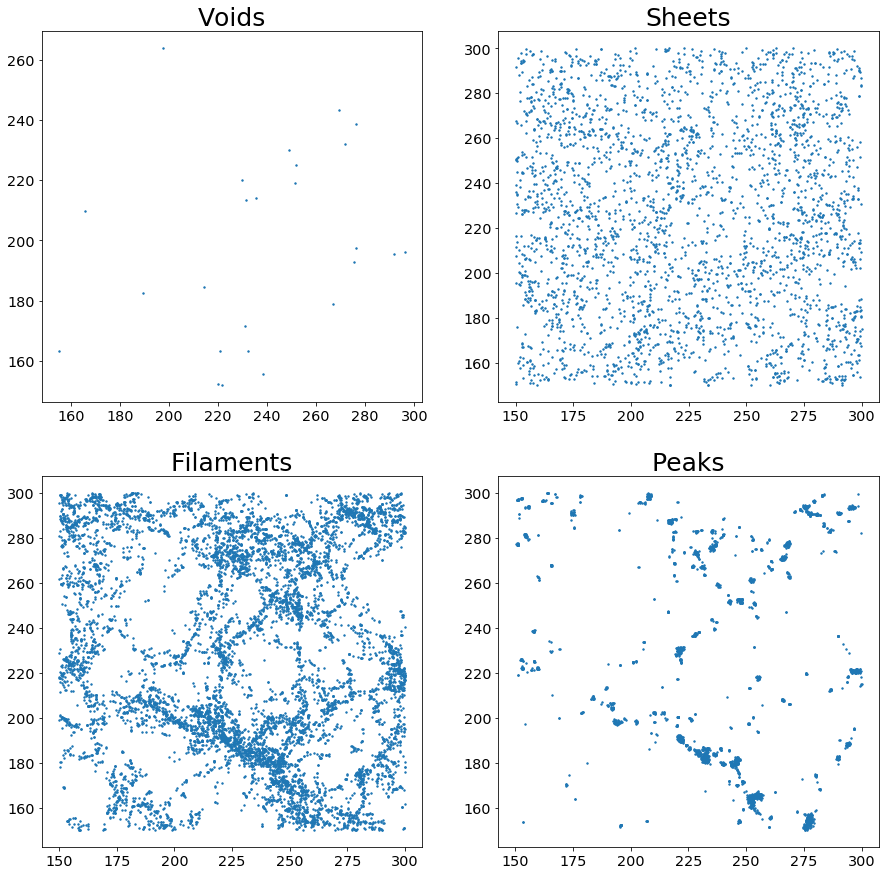

In [6]:
#------------ Loading the model
clf = pickle.load(open(path+'cosmicweb_bsk_model.sav','rb'))
print(clf)

Ypred = clf.predict(Xdata)

ii = (z > (max(z)-min(z))/2 +min(z) -20 ) & (z < (max(z)-min(z))/2 + min(z) + 20 )

x_pred_void = x[(Ypred==3) & ii]
x_pred_sheet = x[(Ypred==2) & ii]
x_pred_fila = x[(Ypred==1) & ii]
x_pred_peak = x[(Ypred==0) & ii]

y_pred_void = y[(Ypred==3) & ii]
y_pred_sheet = y[(Ypred==2) & ii]
y_pred_fila = y[(Ypred==1) & ii]
y_pred_peak = y[(Ypred==0) & ii]


size = 2
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Voids")
plt.scatter(x_pred_void,y_pred_void, s=size)
plt.subplot(2,2,2)
plt.title("Sheets")
plt.scatter(x_pred_sheet,y_pred_sheet, s=size)
plt.subplot(2,2,3)
plt.title("Filaments")
plt.scatter(x_pred_fila,y_pred_fila, s=size)
plt.subplot(2,2,4)
plt.title("Peaks")
plt.scatter(x_pred_peak,y_pred_peak, s=size)

plt.savefig('./figures/result.png', bbox_inches='tight', resterized=True, transparent=True)
plt.show()